In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "car.data"

colnames=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car'] 
# podaci po kolonama su razdvojeni zarezom
car_data = pd.read_csv(file_path, names=colnames, delimiter=",", header=None)

In [101]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Provera ucitanih podataka:
Broj instanci: 1728, 6 ulaza i jedan izlaz

In [102]:
car_data.shape

(1728, 7)

Provera tipa podataka:

In [103]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [104]:
#Provera da li su svi input podaci navedeni
counter_nan = car_data.isnull().sum()
counter_nan

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
car         0
dtype: int64

In [105]:
car_data=car_data.sample(frac=1) #shuffle-ovanje podataka
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,car
1233,med,low,3,more,small,low,unacc
867,med,vhigh,2,2,med,low,unacc
1504,low,high,5more,more,small,med,acc
1695,low,low,4,more,med,low,unacc
1498,low,high,5more,4,med,med,acc


## Vizualizacija podataka

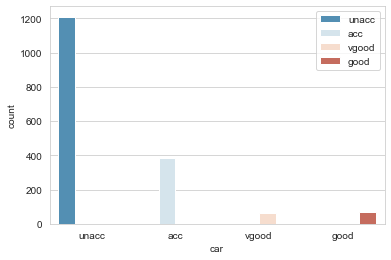

In [106]:
sns.set_style('whitegrid')
sns.countplot(x='car', hue='car', data=car_data, palette='RdBu_r')
plt.legend(loc = 'upper right')

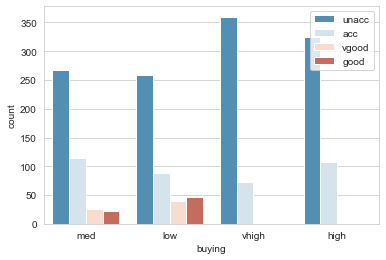

In [107]:
sns.set_style('whitegrid')
sns.countplot(x='buying', hue='car', data=car_data, palette='RdBu_r')
plt.legend(loc = 'upper right')

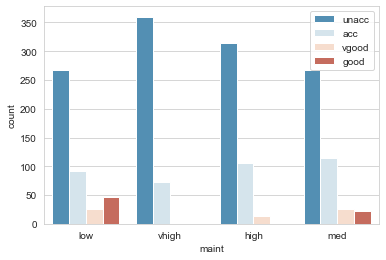

In [108]:
sns.set_style('whitegrid')
sns.countplot(x='maint', hue='car', data=car_data, palette='RdBu_r')
plt.legend(loc = 'upper right')

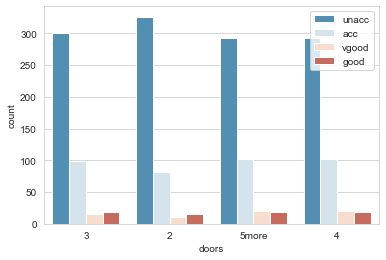

In [109]:
sns.set_style('whitegrid')
sns.countplot(x='doors', hue='car', data=car_data, palette='RdBu_r')
plt.legend(loc = 'upper right')

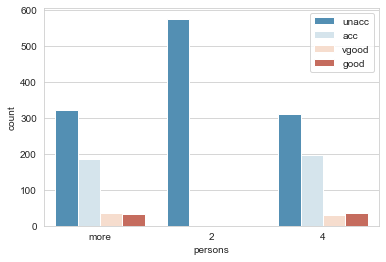

In [110]:
sns.set_style('whitegrid')
sns.countplot(x='persons', hue='car', data=car_data, palette='RdBu_r')
plt.legend(loc = 'upper right')

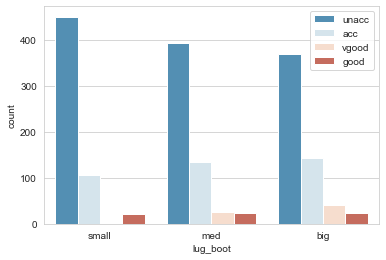

In [111]:
sns.set_style('whitegrid')
sns.countplot(x='lug_boot', hue='car', data=car_data, palette='RdBu_r')
plt.legend(loc = 'upper right')

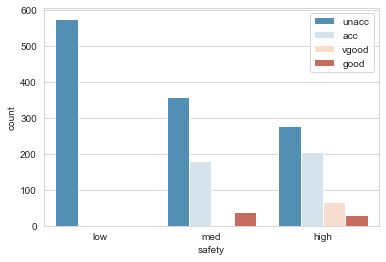

In [112]:
sns.set_style('whitegrid')
sns.countplot(x='safety', hue='car', data=car_data, palette='RdBu_r')
plt.legend(loc = 'upper right')

## Model neurosnske mreže
### Preprocesiranje podataka - One-hot encoding

In [113]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Podela podataka na skup podataka za treniranje i skup podataka za testiranje (prvobitno je uzeto 20% za testiranje, od kojih ce jedna polovina biti iskoriscena za test a druga za validaciju)

In [114]:
train_data, test_data_temp=train_test_split(car_data, test_size=0.2, random_state=42)
train_data.shape, test_data_temp.shape

((1382, 7), (346, 7))

In [115]:
test_data, validation_data = train_test_split(test_data_temp, test_size=0.5)
test_data.shape, validation_data.shape

((173, 7), (173, 7))

Provera da li su podaci dobro podeljeni na skup za treniranje, test i validaciju:

In [116]:
car_data.shape[0] == train_data.shape[0]+test_data.shape[0]+validation_data.shape[0]

True

In [117]:
test_data.shape, validation_data.shape, train_data.shape

((173, 7), (173, 7), (1382, 7))

In [118]:
train_stats=train_data.describe()
train_stats.pop("car")
train_stats = train_stats.transpose()
train_stats

,count,unique,top,freq
buying,1382,4,med,357
maint,1382,4,vhigh,352
doors,1382,4,3,349
persons,1382,3,4,468
lug_boot,1382,3,small,463
safety,1382,3,med,465


Podela skupa podataka na ulazne i izlazne:

In [119]:
X_train = train_data.drop("car", axis=1)
X_test = test_data.drop("car", axis=1)
y_train = train_data["car"]
y_test = test_data["car"]
X_valid = validation_data.drop("car", axis=1)
y_valid = validation_data["car"]

In [120]:
X_train.head(10)

,buying,maint,doors,persons,lug_boot,safety
1024,med,high,3,more,big,med
709,high,med,4,2,big,med
1595,low,med,5more,2,small,high
1554,low,med,3,4,big,low
779,high,low,2,more,med,high
30,vhigh,vhigh,3,2,med,low
1267,med,low,4,more,big,med
768,high,low,2,4,med,low
1675,low,low,4,2,small,med
588,high,high,3,more,med,low


U okviru preprocesiranja podataka koriscen je One-Hot Encoding radi predstavljanja podataka tipa object u obliku binarnih vektora.
Funkcija get_dummies se koristi za primenu ovog nacina enkodovanja.

"pd.get_dummies when applied to a column of categories where we have one category per observation will produce a new column (variable) for each unique categorical value. It will place a one in the column corresponding to the categorical value present for that observation. This is equivalent to one hot encoding." 

In [121]:
y_train_encoded = pd.get_dummies(y_train)   
y_test_encoded = pd.get_dummies(y_test)
X_train_encoded= pd.get_dummies(X_train)    
X_test_encoded = pd.get_dummies(X_test)

X_valid_encoded = pd.get_dummies(X_valid)
y_valid_encoded = pd.get_dummies(y_valid)

In [122]:
X_train_encoded.head(10)

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1024,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
709,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1595,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1554,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
779,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
30,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1267,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
768,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1675,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
588,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0


In [123]:
X_valid_encoded.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1307,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,1,0,0
1658,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1529,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
52,0,0,0,1,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
97,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1


In [124]:
X_test_encoded.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
667,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
912,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
480,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
823,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
348,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0


## Model neuronske mreze

Nakon sto smo izvrsili preprocesiranje podataka, mozemo konstruisati model nase neuronske mreze.

In [125]:
tf.random.set_seed(0)

model=tf.keras.models.Sequential(layers=[
      
      tf.keras.layers.Dense(21, input_shape=(X_train_encoded.shape[1],)),
      tf.keras.layers.Dense(4,activation="softmax")
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(0.1), 
                 metrics=["accuracy"])

proces = model.fit(X_train_encoded,y_train_encoded,epochs=50, validation_data=(X_valid_encoded, y_valid_encoded))

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 0.7225 - accuracy: 0.7098 - val_loss: 0.5274 - val_accuracy: 0.7341
Epoch 2/50
44/44 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.8343 - val_loss: 0.4252 - val_accuracy: 0.8555
Epoch 3/50
44/44 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.8560 - val_loss: 0.3785 - val_accuracy: 0.8382
Epoch 4/50
44/44 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8683 - val_loss: 0.3428 - val_accuracy: 0.8786
Epoch 5/50
44/44 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8792 - val_loss: 0.3216 - val_accuracy: 0.8844
Epoch 6/50
44/44 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.8813 - val_loss: 0.3039 - val_accuracy: 0.8902
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.8886 - val_loss: 0.2904 - val_accuracy: 0.8960
Epoch 8/50
44/44 [==

In [126]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 88        
Total params: 550
Trainable params: 550
Non-trainable params: 0
_________________________________________________________________


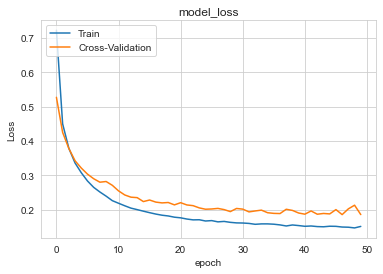

In [127]:
plt.plot(proces.history['loss'])
plt.plot(proces.history['val_loss'])
plt.title('model_loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

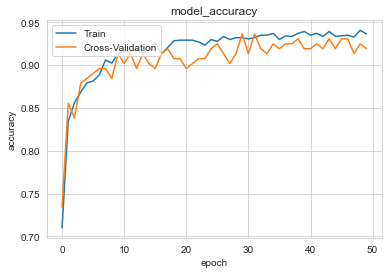

In [128]:
plt.plot(proces.history['accuracy'])
plt.plot(proces.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

<AxesSubplot:xlabel='Epohe'>

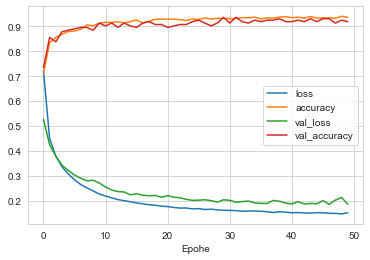

In [129]:
pd.DataFrame(proces.history).plot(xlabel="Epohe")

In [130]:
print('Train Split: ')
loss, accuracy = model.evaluate(X_train_encoded, y_train_encoded, verbose=1)
format(accuracy)

Train Split: 
44/44 [==============================] - 0s 882us/step - loss: 0.1437 - accuracy: 0.9385


'0.9384949207305908'

In [131]:
print('Test Split: ')
loss, accuracy = model.evaluate(X_test_encoded, y_test_encoded, verbose=1)
format(accuracy)

Test Split: 
6/6 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.9538


'0.9537572264671326'

In [132]:
print('Evaluation Split: ')
loss, accuracy = model.evaluate(X_valid_encoded, y_valid_encoded, verbose=1)
format(accuracy)

Evaluation Split: 
6/6 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9191


'0.9190751314163208'

In [133]:
import time
from sklearn.metrics import classification_report
izlaziString=["acc","good","unacc","vgood"];
izlazi=[];
pretpostavke=model.predict(X_test_encoded)
#pretpostavke
najboljiIzbor=np.argmax(pretpostavke,axis=-1);
for i in range(0,len(najboljiIzbor)):
    izlazi.append(izlaziString[najboljiIzbor[i]]);
najboljiIzbor
print(classification_report(y_test,izlazi));

              precision    recall  f1-score   support

         acc       0.83      0.97      0.90        31
        good       0.75      0.50      0.60         6
       unacc       1.00      0.97      0.98       126
       vgood       0.91      1.00      0.95        10

    accuracy                           0.95       173
   macro avg       0.87      0.86      0.86       173
weighted avg       0.96      0.95      0.95       173



In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Matrica konfuzije

Text(0.5, 1.0, 'Confusion matrix')

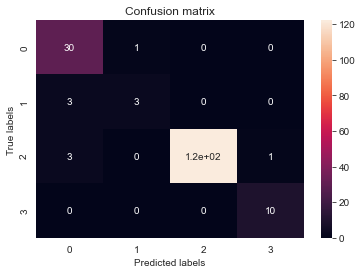

In [135]:
ax=plt.subplot()
predict_results = model.predict(X_test_encoded)

predict_results = predict_results.argmax(axis=1)

cm = confusion_matrix(y_test, izlazi)

sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')

In [136]:
from prettytable import PrettyTable
t = PrettyTable(['Br instance', 'Pretpostavka', 'Stvarna vrednost'])

cnt=0;
for i in range(0,test_data.shape[0]):
    if(izlazi[i]!=y_test.iloc[i]):
      cnt = cnt+1;
      t.add_row([i, izlazi[i], y_test.iloc[i]])
print(t)
err=1/(test_data.shape[0]/cnt)*100
accuracy=100-err;
print(err, "% greske")
print(accuracy, "% tacnosti")

+-------------+--------------+------------------+
| Br instance | Pretpostavka | Stvarna vrednost |
+-------------+--------------+------------------+
|      9      |     good     |       acc        |
|      29     |     acc      |      unacc       |
|      67     |    vgood     |      unacc       |
|     106     |     acc      |      unacc       |
|     110     |     acc      |       good       |
|     123     |     acc      |       good       |
|     124     |     acc      |      unacc       |
|     152     |     acc      |       good       |
+-------------+--------------+------------------+
4.624277456647398 % greske
95.3757225433526 % tacnosti
